# Creating a Model to Predict Spam

### This notebook will detail the steps necessary to create a model that predicts whether or not a text message is spam based on the body of the text. 

In [1]:
import pandas as pd
import prepare as p
import re
import matplotlib.pyplot as plt

# Acquire

In [2]:
df = pd.read_csv('spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Prepare

- lowercase all text
- normalize text
- remove extra white space
- lemmatize
- remove stop words
- tokenize
- save results in new column

In [3]:
df = df.assign(prepped = df.text.apply(p.normalize))
df.prepped.head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: prepped, dtype: object

In [5]:
df.prepped = df.prepped.apply(p.lemmatize)
df.prepped.head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he go to usf he life around ...
Name: prepped, dtype: object

In [6]:
df.prepped = df.prepped.apply(p.remove_stopwords)
df.prepped.head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3                  u dun say early hor u c already say
4                  nah think go usf life around though
Name: prepped, dtype: object

In [12]:
df.prepped = df.prepped.apply(p.tokenize)
df.head()

,label,text,prepped
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


# Explore

### Here we will explore the text words and look for trends/patterns with regards to ham/spam label

In [8]:
df.label.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

#### Takeaway: 87% of text messages are good. Only 13% are spam

Text(0.5, 1.0, '10 most common words')

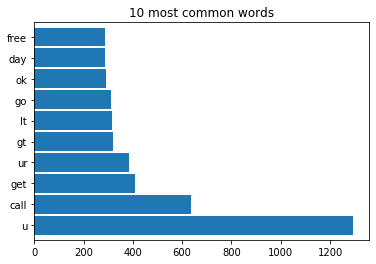

In [9]:
raw_count = pd.Series(" ".join(df.prepped).split()).value_counts()
raw_count.sort_values(ascending=False)[0:10].plot.barh(width=.9)
plt.title('10 most common words')

Text(0.5, 1.0, '10 most common Ham words')

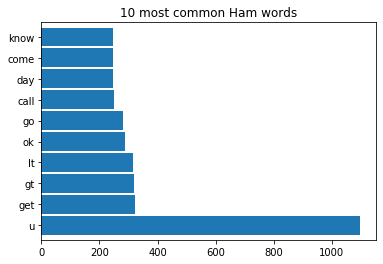

In [10]:
raw_count = pd.Series(" ".join(df[df.label == 'ham'].prepped).split()).value_counts()
raw_count.sort_values(ascending=False)[0:10].plot.barh(width=.9)
plt.title('10 most common Ham words')

Text(0.5, 1.0, '10 most common Spam words')

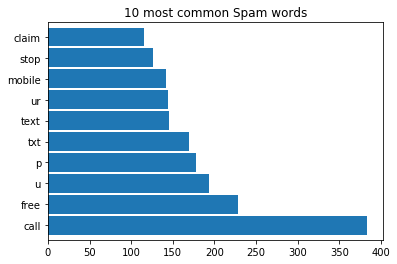

In [11]:
#ham = pd.Series(df.label[label == 'ham'])
raw_count = pd.Series(" ".join(df[df.label == 'spam'].prepped).split()).value_counts()
raw_count.sort_values(ascending=False)[0:10].plot.barh(width=.9)
plt.title('10 most common Spam words')

# Model